##  IMPORTING LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.axes as ax

## LOADING DATA

In [2]:
data = pd.read_csv('data_for_lr.csv')

In [3]:
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


## Data Preprocessing

### Handling Null Values

In [6]:
data = data.dropna()

In [7]:
print("Shape of the data:",data.shape)

Shape of the data: (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


## Splitting the data

In [9]:
# training datasets and labels
# we are choosing 500 elements for training and then reshape it into 500 rows to 1 column
# This takes the first 500 elements (indices 0 to 499)
train_input = np.array(data.x[0:500]).reshape(500,1)   
train_output = np.array(data.y[0:500]).reshape(500,1)

# testing 
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

# PRinting shapes
print("Training input : {}".format(train_input.shape))
print("Training output : {}".format(train_output.shape))
print("Testing input : {}".format(test_input.shape))
print("Testing output : {}".format(test_output.shape))


Training input : (500, 1)
Training output : (500, 1)
Testing input : (199, 1)
Testing output : (199, 1)


# <font color = "green">Linear Regression</font>

## Forward propogation

**f(x) = m*x + c** ; where m and c are the parameters that or model will learn through training.

In [10]:
def forward_propogation(train_input,parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m,train_input)+c
    return predictions

## Defining Cost Funciton

**Mean Squared Error, Cost = [(y - f(x)) ^ 2] * 0.5**

where y are the actual or true values and f(x) are the predicted values.

In [11]:
def cost_func(predictions,train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5
    return cost

## Gradient Descent for Backpropagation

<u>Using Chain Rule:</u>
- cost
- f = f(x)

Partial Derivative of cost function w.r.t m 
**dcost/dm = dcost/df * df/dm **

Partial Derivative of cost function w.r.t c
**dcost/dc = dcost/df * df/dc **

<u>Partial Derivatives:</u>
- dcost/df = (f - y)/n
- df/dm = x
- df/dc = 1

In [12]:
def backward_propogation(train_input,train_output,predicitons):
    derivatives = dict()
    # the df here is difference btw the predicited and the actual value
    df = (predicitons - train_output)
    dm = np.mean(np.multiply(train_input,df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives
    

## Update the Parameters

- m' = m - alpha (dm)
- c' = c - alpha (dc)

alpha here is learning rate

In [18]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters['m'] = parameters['m'] - (learning_rate * derivatives['dm'])
    parameters['c'] = parameters['c'] - (learning_rate * derivatives['dc'])
    return parameters
    

## Train the Models

Sequence of Steps:

- Forward Propagtaion
- Cost Function
- Backward Propagation
- Update Parameters

In [19]:
def train(train_input,train_output,learning_rate,iters):

    # random parameter
    parameters = dict()
    parameters['m'] = np.random.uniform(0,1)
    parameters['c'] = np.random.uniform(0,1)

    plt.figure()
    
    # loss
    loss = list()

    # iterate
    for i in range(iters):
        #forward propagation
        predictions = forward_propogation(train_input, parameters)
        
        #cost function
        cost = cost_func(predictions, train_output)

        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))

        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        

        # back propogation
        derivatives = backward_propogation(train_input,train_output,predictions)

        # Updating Parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)

    return parameters,loss
        
    

## Training

Iteration = 1, Loss = 866.6112227329565


<Figure size 640x480 with 0 Axes>

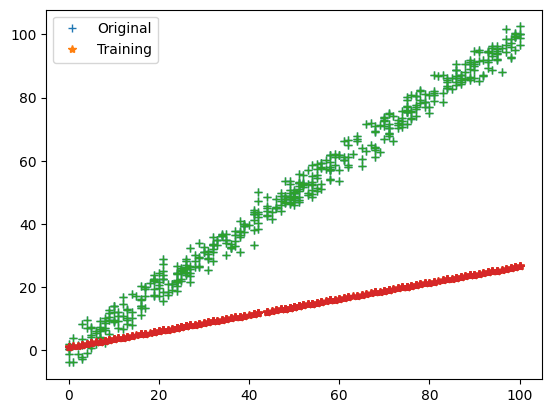

Iteration = 2, Loss = 395.41924131292825


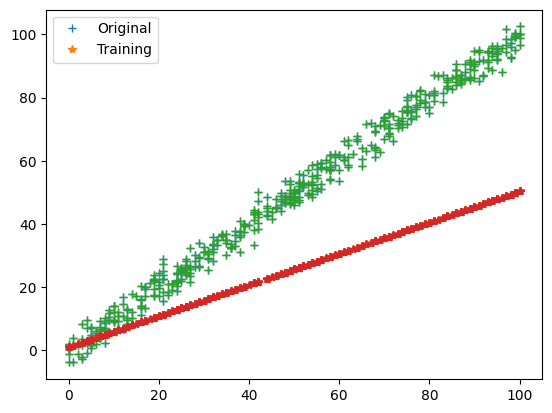

Iteration = 3, Loss = 181.6389123662602


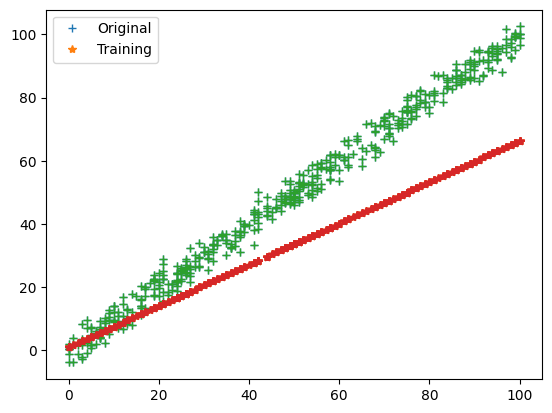

Iteration = 4, Loss = 84.6465352667662


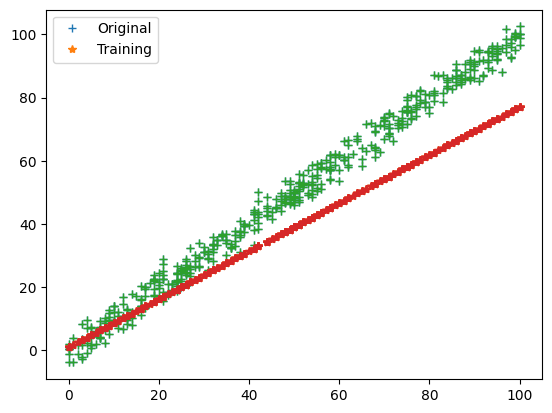

Iteration = 5, Loss = 40.64098127973883


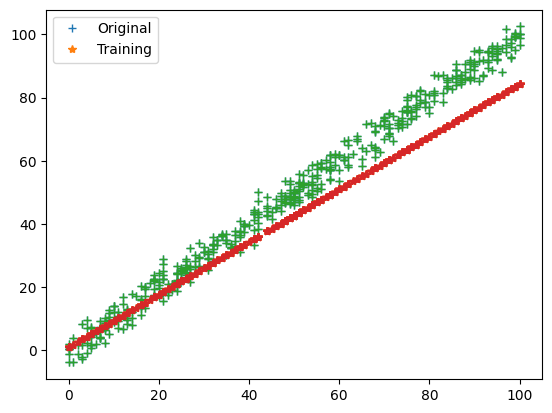

Iteration = 6, Loss = 20.675607629481846


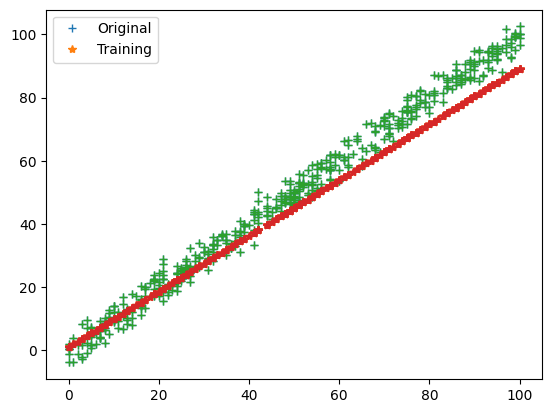

Iteration = 7, Loss = 11.61729042616717


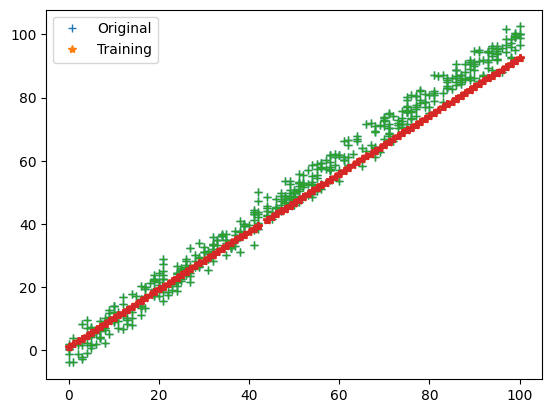

Iteration = 8, Loss = 7.5075168141905735


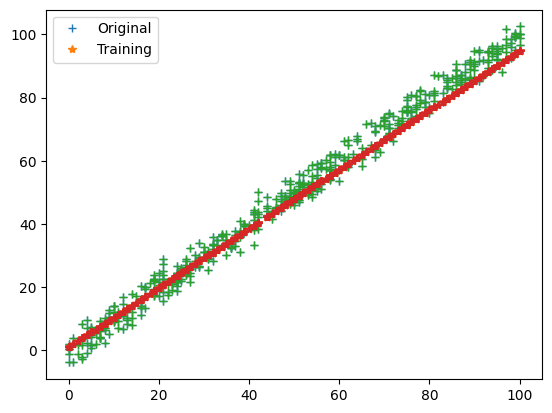

Iteration = 9, Loss = 5.642902911069952


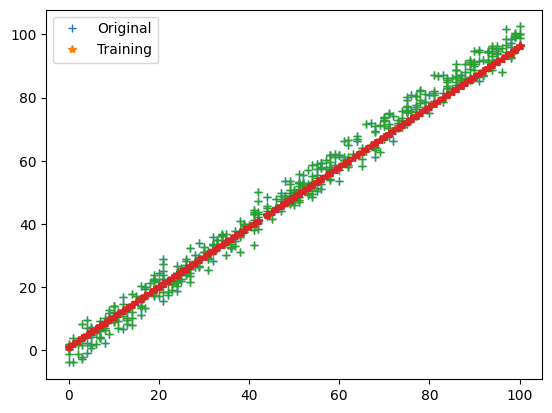

Iteration = 10, Loss = 4.796920454943761


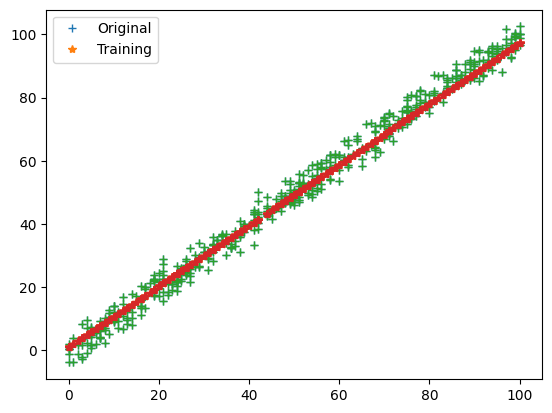

Iteration = 11, Loss = 4.4130922148521545


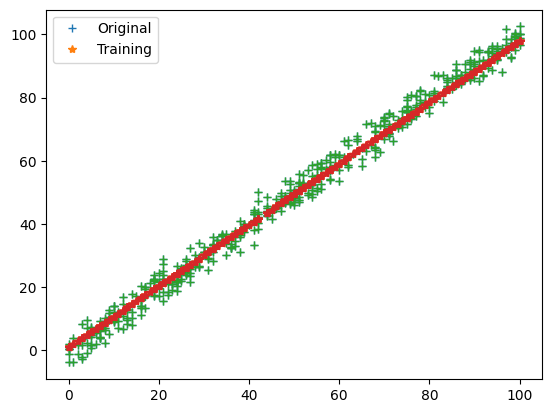

Iteration = 12, Loss = 4.238943854731527


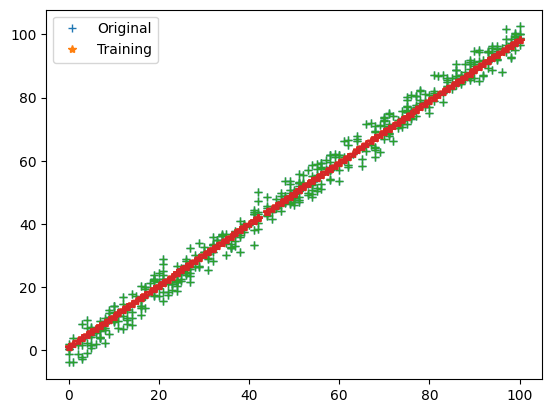

Iteration = 13, Loss = 4.159927488658814


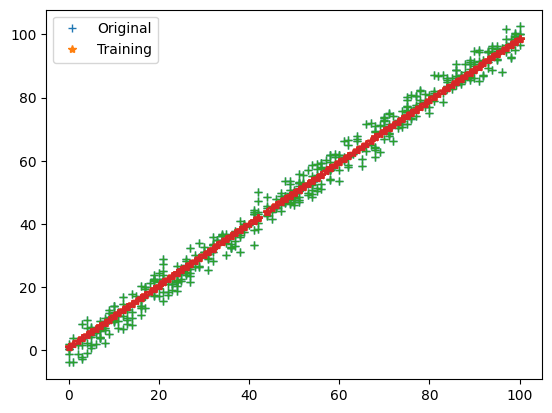

Iteration = 14, Loss = 4.124072613912754


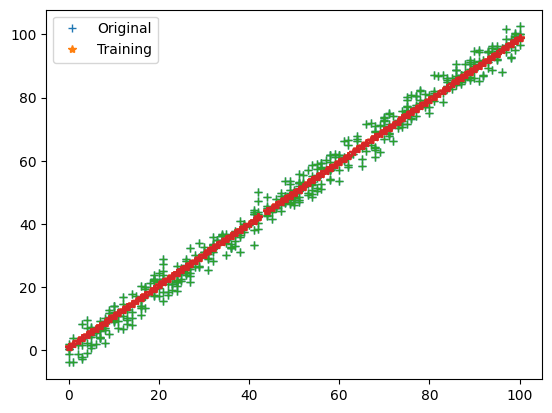

Iteration = 15, Loss = 4.107800155844036


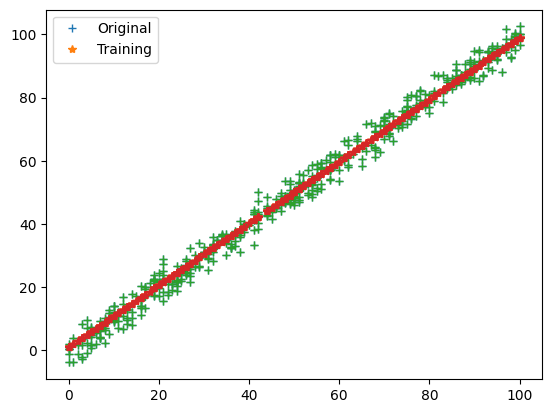

Iteration = 16, Loss = 4.100412262167092


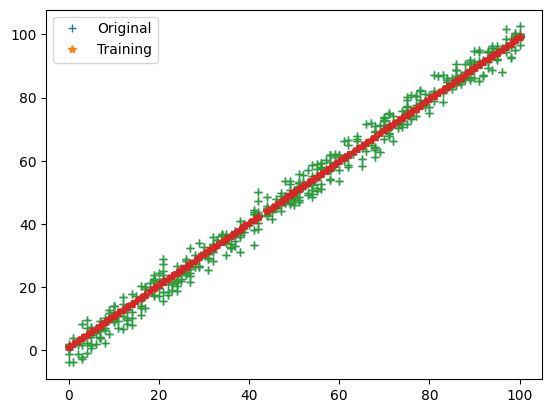

Iteration = 17, Loss = 4.097055305450566


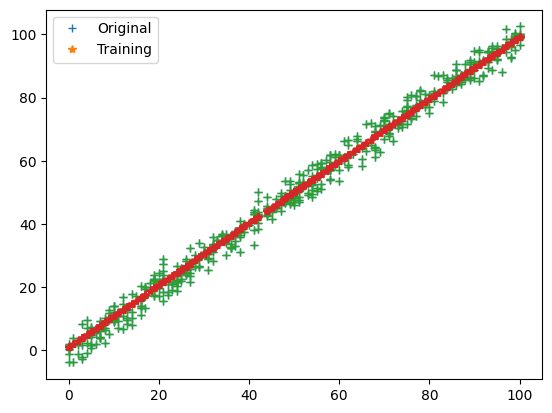

Iteration = 18, Loss = 4.095527189552762


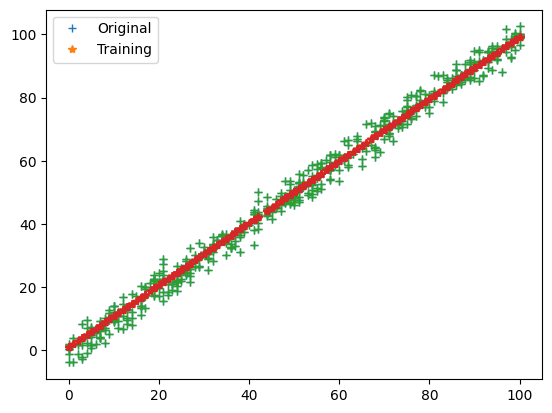

Iteration = 19, Loss = 4.094828821015044


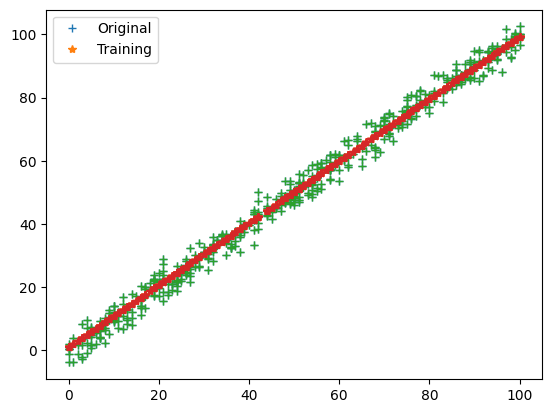

Iteration = 20, Loss = 4.094506910028587


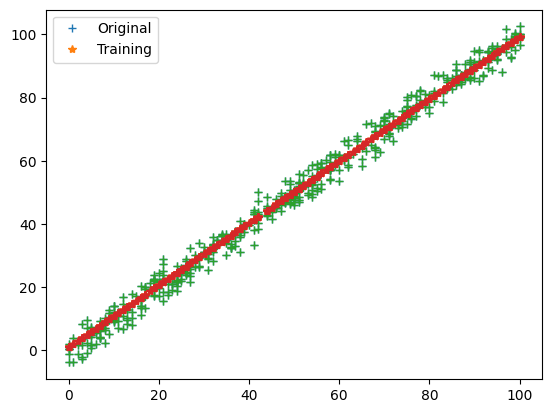

In [20]:
parameters,loss = train(train_input,train_output,0.0001,20)

In [21]:
print(parameters)

{'m': 0.9824368602741765, 'c': 0.9721693821467988}


- Now we got the proper m and c values

# Predicting

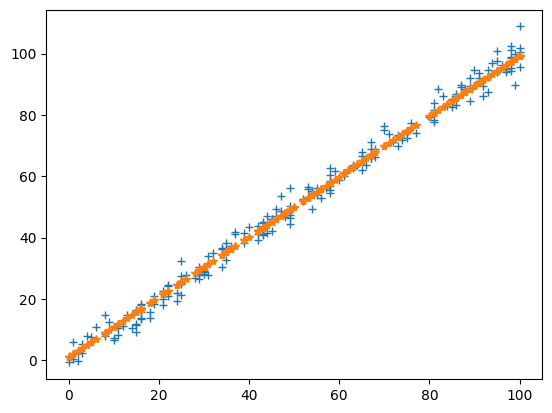

In [23]:
test_predictions = test_input*parameters['m'] + parameters['c']
plt.figure()
plt.plot(test_input,test_output,'+')
plt.plot(test_input,test_predictions,'*')
plt.show()

# Cost of Test Data

In [24]:
cost_func(test_predictions,test_output)

4.0684158672670865